# Importações e configurações

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

from tpot import TPOTClassifier

import matplotlib.pyplot as plt

import xgboost as xgb

import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
RANDOM_SEED = 42

# Carregando os dados

In [81]:
df = pd.read_excel("../data/cleaned_datas/cleaned_data_aprovados.xlsx")

In [82]:
df

,Aluno contemplado com bolsa?,Auxílio digital_CHIP da RNP,Auxílio digital_Não foi contemplado,Auxílio digital_Valor para dispositivo,Auxílio digital_Valor para plano de dados,Auxílio digital_Valor para plano de dados e dipositivo,Como você acessa os serviços de saúde_Plano de saúde (Privado),Como você acessa os serviços de saúde_Público e privado,Como você acessa os serviços de saúde_Sistema Público de Saúde,Como você acessa/acessou à educação básica (Ensino Médio)_Bolsista de escola privada,...,"Em seu endereço atual, como você mora?_Pensão/quarto/república com mais de uma pessoa","Em seu endereço atual, como você mora?_Sozinho(a)",Período,Quantidade de disciplinas no período,Recebe algum tipo de bolsa estudantil,Relato de vida,Renda bruta familiar,Renda per capita,Você é chefe de família ou responsável pela própria subsistência?,"É cotista por renda inferior a 1,5 salário mínimo?"
0,True,False,True,False,False,False,False,False,True,False,...,False,False,1,12,False,"Minha mãe acabou falecendo um pouco cedo, entã...",1100.0,275.0,False,True
1,True,False,True,False,False,False,False,False,True,False,...,False,False,4,13,False,"Eu moro com mais pais, e meu irmão mais novo. ...",1000.0,250.0,False,True
2,True,False,True,False,False,False,False,True,False,False,...,False,False,1,8,False,"Sou casada e moro com o meu marido, não tenho ...",890.0,445.0,False,True
3,True,False,False,False,False,True,False,False,True,False,...,False,False,2,5,False,"meu nome é Talita, moro com meus pais que são ...",2500.0,625.0,False,True
4,True,False,True,False,False,False,False,False,True,False,...,False,False,6,8,False,"Sou solteiro, sem filhos, morando com meus pai...",1100.0,275.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17728,True,False,True,False,False,False,True,False,False,False,...,False,False,3,3,False,"Moro com minha mãe e minha vó, minha mãe e tra...",2424.0,808.0,False,False
17729,True,False,True,False,False,False,False,False,True,False,...,False,False,3,6,False,Atualmente moro com minha mãe (Normanda) e com...,1200.0,300.0,False,True
17730,True,False,True,False,False,False,False,False,True,False,...,False,False,4,3,True,No momento eu sou responsável legal de uma pri...,1900.0,475.0,True,True
17731,True,False,False,False,True,False,False,False,True,False,...,False,True,4,1,True,"Eu, João Paulo de Souza Lima, sou solteiro e n...",400.0,400.0,True,True


# Pré-processamento dos dados

## Dropando a coluna Relatos de vida (TEMPORÁRIO)

In [83]:
df = df.drop(columns=["Relato de vida"])

## Transformando float64 em float

In [84]:
df.dtypes

Aluno contemplado com bolsa?                                                                bool
Auxílio digital_CHIP da RNP                                                                 bool
Auxílio digital_Não foi contemplado                                                         bool
Auxílio digital_Valor para dispositivo                                                      bool
Auxílio digital_Valor para plano de dados                                                   bool
Auxílio digital_Valor para plano de dados e dipositivo                                      bool
Como você acessa os serviços de saúde_Plano de saúde (Privado)                              bool
Como você acessa os serviços de saúde_Público e privado                                     bool
Como você acessa os serviços de saúde_Sistema Público de Saúde                              bool
Como você acessa/acessou à educação básica (Ensino Médio)_Bolsista de escola privada        bool
Como você acessa/acessou à edu

## Analisando correlação entre features

Por enquanto, vou manter sem o drop destas colunas correlacionadas.

In [85]:
"""
def get_highly_correlated_features(correlation_matrix, threshold):
  correlated_pairs = []
  for i in range(len(correlation_matrix.columns)):
    for j in range(i):
      if abs(correlation_matrix.iloc[i, j]) > threshold:
        pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
        coefficient = correlation_matrix.iloc[i, j]
        correlated_pairs.append((pair, coefficient))
  return sorted(correlated_pairs, key= lambda pair: pair[1], reverse=True)
"""

'\ndef get_highly_correlated_features(correlation_matrix, threshold):\n  correlated_pairs = []\n  for i in range(len(correlation_matrix.columns)):\n    for j in range(i):\n      if abs(correlation_matrix.iloc[i, j]) > threshold:\n        pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])\n        coefficient = correlation_matrix.iloc[i, j]\n        correlated_pairs.append((pair, coefficient))\n  return sorted(correlated_pairs, key= lambda pair: pair[1], reverse=True)\n'

In [86]:
"""
corr_matrix = df.corr().abs()
correlation_list = get_highly_correlated_features(corr_matrix, 0.95)
"""

'\ncorr_matrix = df.corr().abs()\ncorrelation_list = get_highly_correlated_features(corr_matrix, 0.95)\n'

In [87]:
#correlation_list[:10]

In [88]:
"""
f2drop = []
for feature_pair, _ in correlation_list:
  if feature_pair[0] not in f2drop and feature_pair[1] not in f2drop:
    f2drop.append(feature_pair[1])
"""

'\nf2drop = []\nfor feature_pair, _ in correlation_list:\n  if feature_pair[0] not in f2drop and feature_pair[1] not in f2drop:\n    f2drop.append(feature_pair[1])\n'

In [89]:
#f2drop

In [90]:
#df = df.drop(f2drop, axis='columns')

## Lidando com valores nulos

In [91]:
#imputer = KNNImputer(n_neighbors=3)

In [92]:
#df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

## Dividindo dados nos conjuntos de treino, validação e teste

In [93]:
labels = df[['Aluno contemplado com bolsa?']].copy()
df = df.drop(columns=['Aluno contemplado com bolsa?'])

In [94]:
#def convert_label(value):
#    return False if value <= 0.5 else True

In [95]:
labels

,Aluno contemplado com bolsa?
0,True
1,True
2,True
3,True
4,True
...,...
17728,True
17729,True
17730,True
17731,True


In [96]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.1)#, random_state=RANDOM_SEED)

## Normalizando os dados numéricos

In [97]:
#numeric_columns = df.select_dtypes(include=['number']).columns

X_train_unormalized = X_train

std_scaler = StandardScaler()
std_scaler = std_scaler.fit(X_train)

X_train = std_scaler.transform(X_train)
X_test = std_scaler.transform(X_test)

# Inteligências artificiais

## Funções de métricas

In [98]:
def get_overall_metrics(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  acc = (tp+tn)/(tp+tn+fp+fn)
  tpr = tp/(tp+fn)
  fpr = fp/(fp+tn)
  precision = tp/(tp+fp)
  f1 = (2*tpr*precision)/(tpr+precision)
  return {'acc':acc,'tpr':tpr,'fpr':fpr,'precision':precision,'f1-score':f1}

In [99]:
def transform_prob_in_pred(probs):
    predict_list = list()
    for prob in probs:
        if prob[0] > prob[1]:
            predict_list.append(False)
        elif prob[0] < prob[1]:
            predict_list.append(True)

    predict_array = np.array(predict_list)
    return predict_array

## Modelos de aprendizagem de máquina clássicos

### Naive bayesian

#### Treinamento

In [100]:
model = GaussianNB()

In [101]:
model.fit(X_train, y_train)

GaussianNB()

#### Teste

In [102]:
y_pred_proba = model.predict_proba(X_test)

In [103]:
y_pred = model.predict(X_test)

In [104]:
class_labels = model.classes_
print(class_labels)

[False  True]


In [105]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7204058624577226
Precision: 0.7176094985082339
Recall: 0.7204058624577226


In [106]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.7204058624577226,
 'tpr': 0.8269230769230769,
 'fpr': 0.6837837837837838,
 'precision': 0.8210749646393211,
 'f1-score': 0.8239886444286728}

### Logistic regression

#### Treinamento

In [107]:
model = LogisticRegression()

In [108]:
model.fit(X_train, y_train)

LogisticRegression()

#### Teste

In [109]:
class_labels = model.classes_
print(class_labels)

[False  True]


In [110]:
y_pred_proba = model.predict_proba(X_test)

In [111]:
y_pred = model.predict(X_test)

In [112]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7976324689966178
Precision: 0.763134260125304
Recall: 0.7976324689966178


In [113]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.7976324689966178,
 'tpr': 0.9864672364672364,
 'fpr': 0.918918918918919,
 'precision': 0.8028985507246377,
 'f1-score': 0.8852668584212209}

### Random Forest

#### Treinamento

In [114]:
model = RandomForestClassifier(n_estimators=100)#, random_state=RANDOM_SEED)

In [115]:
model.fit(X_train, y_train)

RandomForestClassifier()

#### Teste

In [116]:
class_labels = model.classes_
print(class_labels)

[False  True]


In [117]:
y_pred_proba = model.predict_proba(X_test)

In [118]:
y_pred = model.predict(X_test)

In [119]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7773393461104848
Precision: 0.7260153236371123
Recall: 0.7773393461104848


In [120]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.7773393461104848,
 'tpr': 0.9408831908831908,
 'fpr': 0.8432432432432433,
 'precision': 0.8089406001224739,
 'f1-score': 0.8699374382614422}

### Gradient Boost Machine

#### Treinamento

In [121]:
model = GradientBoostingClassifier(n_estimators=100)#, random_state=RANDOM_SEED)

In [122]:
model.fit(X_train, y_train)

GradientBoostingClassifier()

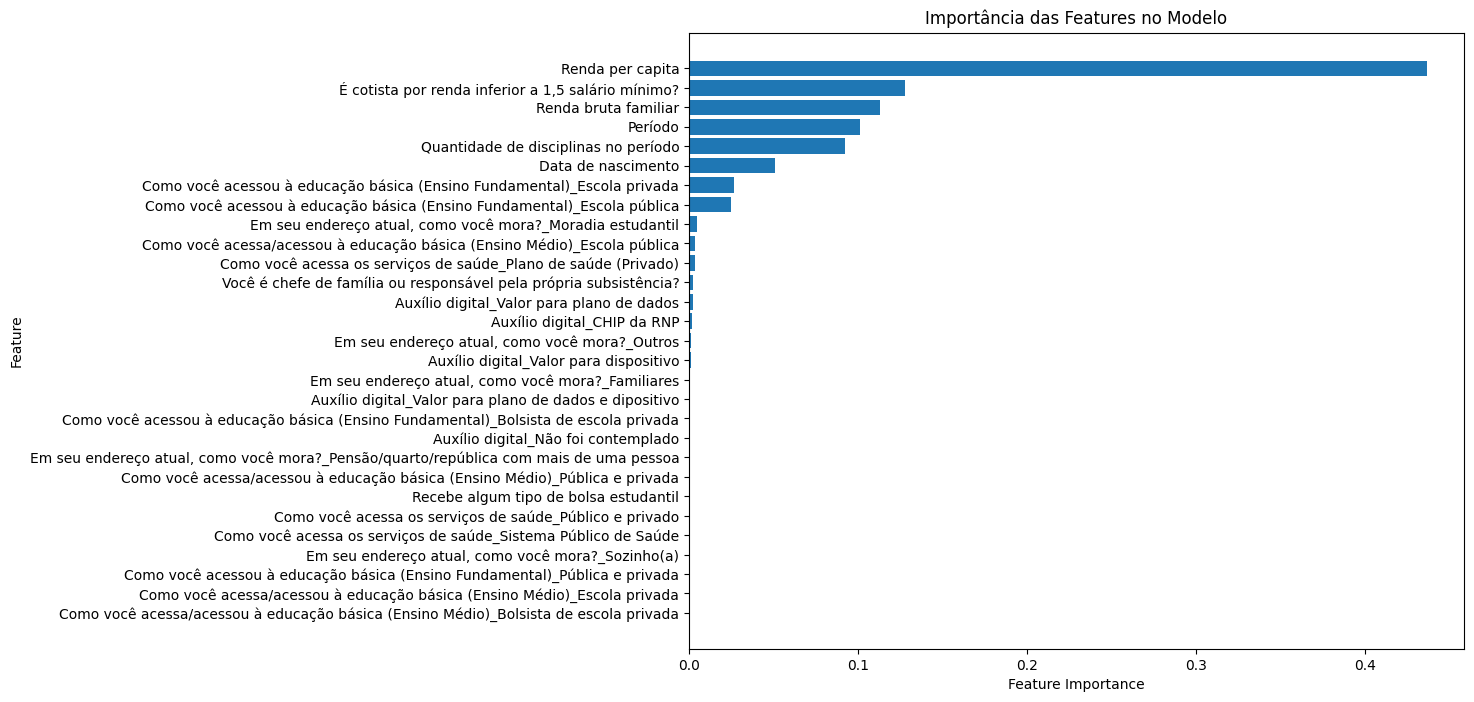

In [123]:
importance = model.feature_importances_

# Converter em DataFrame para facilitar a visualização
importance_df = pd.DataFrame({
    'Feature': X_train_unormalized.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plotar a importância das features
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Importância das Features no Modelo")
plt.gca().invert_yaxis()  # Inverter a ordem para que a feature mais importante apareça no topo
plt.show()

#### Teste

In [124]:
class_labels = model.classes_
print(class_labels)

[False  True]


In [125]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.12957991, 0.87042009],
       [0.18770001, 0.81229999],
       [0.15681822, 0.84318178],
       ...,
       [0.18580497, 0.81419503],
       [0.21925733, 0.78074267],
       [0.53115308, 0.46884692]])

In [126]:
y_pred = model.predict(X_test)

In [127]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7953776775648252
Precision: 0.7549546726578753
Recall: 0.7953776775648252


In [128]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.7953776775648252,
 'tpr': 0.9871794871794872,
 'fpr': 0.9324324324324325,
 'precision': 0.8006932409012132,
 'f1-score': 0.8842105263157894}

### Support Vector Machines

#### Treinamento

In [129]:
model = SVC(probability=True)#, random_state=RANDOM_SEED)

In [130]:
model.fit(X_train, y_train)

SVC(probability=True)

#### Teste

In [131]:
y_pred_proba = model.predict_proba(X_test)

In [132]:
y_pred = model.predict(X_test)

In [133]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7931228861330327
Precision: 0.767258469573623
Recall: 0.7931228861330327


In [134]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.7931228861330327,
 'tpr': 0.9978632478632479,
 'fpr': 0.9837837837837838,
 'precision': 0.7937677053824362,
 'f1-score': 0.8841905964026506}

### Cross Batch Model (XBM)

#### Treinamento

In [135]:
model = XGBClassifier(
    objective='binary:logistic',  # Problema de classificação binária
    booster='gbtree',             # Tipo de booster
    n_estimators=100,             # Número de árvores
    learning_rate=0.178,            # Taxa de aprendizado
    max_depth=6,                  # Profundidade máxima das árvores
    min_child_weight=10,           # Peso mínimo da criança
    gamma=0.5,                      # Redução mínima na função de perda para fazer uma divisão
    subsample=0.8,                # Fração de amostras usadas para ajustar cada árvore
    colsample_bytree=0.8,         # Fração de características usadas para cada árvore            
    alpha=1,                      # Regularização L1
    scale_pos_weight=1           # Peso para a classe positiva
    #random_state=RANDOM_SEED               # Semente para reprodutibilidade
    #n_jobs=6
)

In [136]:
model.fit(X_train, y_train)

XGBClassifier(alpha=1, base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.178, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

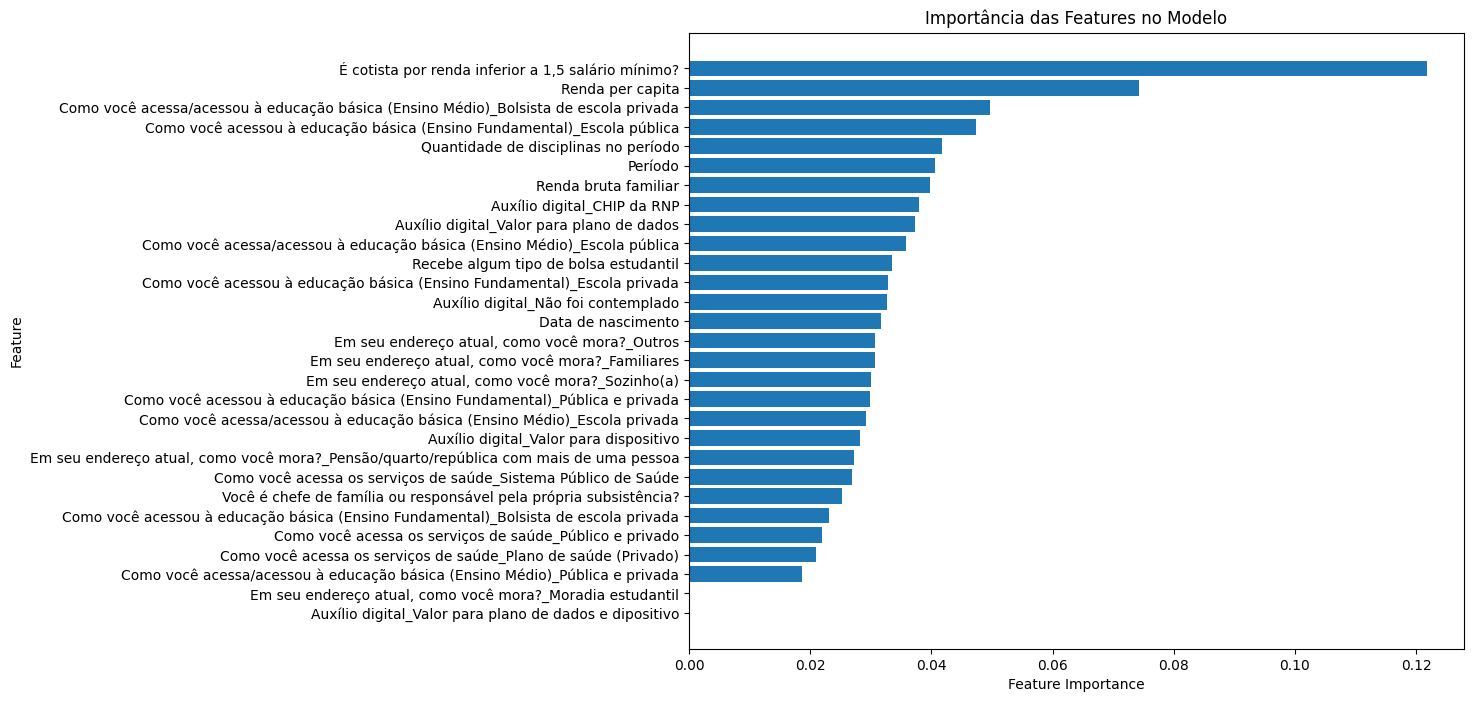

In [137]:
importance = model.feature_importances_

# Converter em DataFrame para facilitar a visualização
importance_df = pd.DataFrame({
    'Feature': X_train_unormalized.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plotar a importância das features
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Importância das Features no Modelo")
plt.gca().invert_yaxis()  # Inverter a ordem para que a feature mais importante apareça no topo
plt.show()

#### Teste

In [138]:
y_pred_proba = model.predict_proba(X_test)

In [139]:
y_pred = model.predict(X_test)

In [140]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7891770011273957
Precision: 0.7362100507534555
Recall: 0.7891770011273957


In [141]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.7891770011273957,
 'tpr': 0.9686609686609686,
 'fpr': 0.8918918918918919,
 'precision': 0.8047337278106509,
 'f1-score': 0.8791208791208791}

## Modelos de aprendizagem profunda

Configurações opcionais:

In [142]:
#labels = tf.keras.utils.to_categorical(labels, num_classes=2)

In [143]:
#labels = to_categorical(labels, num_classes=2)

### Rede neural simples (MLP)

#### Treinamento

In [144]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Camada de entrada com 1536 neurônios
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [145]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [146]:
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

In [147]:
model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/300
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - accuracy: 0.7861 - loss: 0.5584 - val_accuracy: 0.8152 - val_loss: 0.4686
Epoch 2/300
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.7984 - loss: 0.5003 - val_accuracy: 0.8130 - val_loss: 0.4571
Epoch 3/300
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.8059 - loss: 0.4770 - val_accuracy: 0.8139 - val_loss: 0.4559
Epoch 4/300
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.8052 - loss: 0.4737 - val_accuracy: 0.8158 - val_loss: 0.4568
Epoch 5/300
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.7999 - loss: 0.4780 - val_accuracy: 0.8161 - val_loss: 0.4534
Epoch 6/300
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.8030 - loss: 0.4758 - val_accuracy: 0.8167 - val_loss: 0.4554
Epoch 7/300
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.8087 - loss: 0.4702 - val_accuracy: 0.8174 - val_loss: 0.4541
Epoch 8/300
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.8095 - loss: 0

#### Teste

In [148]:
y_pred_proba = model.predict(X_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step


In [149]:
y_pred = transform_prob_in_pred(y_pred_proba)

In [150]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7953776775648252
Precision: 0.7587321559698098
Recall: 0.7953776775648252


In [151]:
get_overall_metrics(y_test, y_pred)

{'acc': 0.7953776775648252,
 'tpr': 0.9907407407407407,
 'fpr': 0.9459459459459459,
 'precision': 0.7989661114302126,
 'f1-score': 0.8845786963434024}

## Aprendizagem de máquina automática (AutoML)

## Tpot

In [152]:
#tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20)
#tpot.fit(X_train, y_train)

In [153]:
#print(tpot.score(X_test, y_test))